In [2]:
#import cv2
#import os
import glob
import sunpy as sun
import numpy as np
#import sympy as sym
#import time
#import os
import matplotlib.pyplot as plt
from matplotlib import patches
import astropy.units as u
#from google.colab import drive
#from google.colab import files
from IPython.display import clear_output
from sunpy.net import Fido, attrs as a
from reproject import reproject_interp
from reproject.mosaicking import reproject_and_coadd
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from scipy.interpolate import griddata
from sunpy.coordinates import propagate_with_solar_surface
from astropy.visualization import ImageNormalize, SqrtStretch
from sunpy.net import Fido
from sunpy.net import attrs as a
from sunpy.map import MapSequence
from sunpy.map import Map
from matplotlib import animation
from sunpy.visualization.animator import MapSequenceAnimator
import sunpy.data.sample
import sunpy.map
import sunpy.sun
from sunpy.coordinates import get_body_heliographic_stonyhurst
from sunpy.data.sample import AIA_193_JUN2012, STEREO_A_195_JUN2012, STEREO_B_195_JUN2012

In [2]:
hmi_res = Fido.search(a.Time('2022-03-29T23:30:00', '2022-03-30T00:30:00'), a.jsoc.Series('hmi.M_45s') , a.jsoc.Notify('s.norenat@uniandes.edu.co'))
#aia_res = Fido.search(a.Time('2022-03-30T00:03:00', '2022-03-31T00:04:00'), a.jsoc.Series('aia.lev1_euv_12s'), a.jsoc.PrimeKey('WAVELNTH', '171'), a.Sample(720*u.s), a.jsoc.Notify('s.norenat@uniandes.edu.co'))
#1 hora antes

#print(res)
#res2 = Fido.search(a.Time('2022-03-30T00:03:00', '2022-03-30T00:04:00'), a.jsoc.Series('aia_45s'), a.jsoc.Notify('s.norenat@uniandes.edu.co'))
#print(res2)
# res2.show('T_REC', 'T_OBS')
#downloaded_files = Fido.fetch(res, path='/content/drive/MyDrive/Research/Coronal rain/FITS')
#res.show()

In [3]:
files = Fido.fetch(hmi_res, path = r"C:\Users\Samuel\OneDrive\Documentos\research\Coronal-Rain\DATA")
#hmi, aia = res
#Fido.fetch(aia_res, path = '/content/drive/MyDrive/Research/Coronal rain/FITS_HMI&AIA')
#hmi_los = hmi[hmi['CONTENT'] == "magnetogram"]


2025-12-21 22:52:44 - drms - INFO: Export request pending. [id=JSOC_20251222_001320, status=2]
2025-12-21 22:52:44 - drms - INFO: Waiting for 5 seconds...
2025-12-21 22:52:50 - drms - INFO: Export request pending. [id=JSOC_20251222_001320, status=1]
2025-12-21 22:52:50 - drms - INFO: Waiting for 10 seconds...
2025-12-21 22:53:00 - drms - INFO: Export request pending. [id=JSOC_20251222_001320, status=1]
2025-12-21 22:53:00 - drms - INFO: Waiting for 10 seconds...
2025-12-21 22:53:11 - drms - INFO: Export request pending. [id=JSOC_20251222_001320, status=1]
2025-12-21 22:53:11 - drms - INFO: Waiting for 10 seconds...
2025-12-21 22:53:21 - drms - INFO: Export request pending. [id=JSOC_20251222_001320, status=1]
2025-12-21 22:53:21 - drms - INFO: Waiting for 10 seconds...
2025-12-21 22:53:32 - sunpy - INFO: 81 URLs found for download. Full request totaling 1277MB


INFO: 81 URLs found for download. Full request totaling 1277MB [sunpy.net.jsoc.jsoc]


Files Downloaded:   0%|          | 0/81 [00:00<?, ?file/s]

hmi.m_45s.20220329_233045_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_233130_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_233215_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_233300_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_233345_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_233430_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_233515_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_233600_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_233645_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_233730_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_233815_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_233900_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_233945_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_234030_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_234115_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_234200_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_234245_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_234330_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_234415_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_234500_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_234545_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_234630_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_234715_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_234800_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_234845_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_234930_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_235015_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_235100_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_235145_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_235230_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_235315_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_235400_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_235445_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_235530_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_235615_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_235700_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_235745_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_235830_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220329_235915_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_000000_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_000045_TAI.2.magnetogram.fits:   0%|          | 0.00/16.6M [00:00<?, ?B/s]

hmi.m_45s.20220330_000130_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_000215_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_000300_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_000345_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_000430_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_000515_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_000600_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_000645_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_000730_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_000815_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_000900_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_000945_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_001030_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_001115_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_001200_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_001245_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_001330_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_001415_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_001500_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_001545_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_001630_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_001715_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_001800_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_001845_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_001930_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_002015_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_002100_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_002145_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_002230_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_002315_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_002400_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_002445_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_002530_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_002615_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_002700_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_002745_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_002830_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_002915_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_003000_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

hmi.m_45s.20220330_003045_TAI.2.magnetogram.fits:   0%|          | 0.00/16.5M [00:00<?, ?B/s]

In [3]:
files = glob.glob(r"C:\Users\Samuel\OneDrive\Documentos\research\Coronal-Rain\DATA\*.fits")
maps_rotated = []

for f in files:
    m = sunpy.map.Map(f)

    # plotting settings
    m.plot_settings['cmap'] = "gray"
    m.plot_settings['norm'] = plt.Normalize(-150, 150)

    # rotate (flip)
    m_rot = m.rotate(order=3)

    maps_rotated.append(m_rot)

KeyboardInterrupt: 

In [11]:
files = glob.glob(
    r"C:\Users\Samuel\OneDrive\Documentos\research\Coronal-Rain\DATA\*.fits"
)

maps_rotated = []

maps = Map(files, allow_errors = True, sequence = True)

for m in maps:
    m.rotate(order=1)
    m.plot_settings['norm'] = plt.Normalize(-150,150)
    m.plot_settings['cmap'] = "gray"
    maps_rotated.append(m)


In [12]:
map_sequence = MapSequence(maps_rotated)

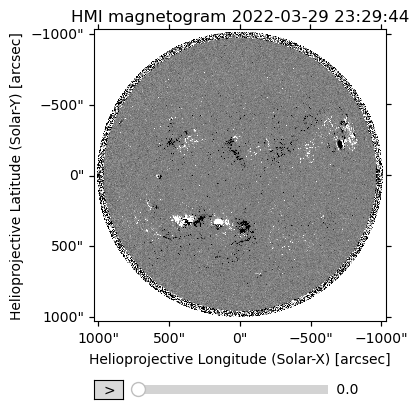

In [13]:
ani = map_sequence.peek()
mplani = ani.get_animation()

2025-12-22 19:44:50 - matplotlib.animation - INFO: Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-12-22 19:44:50 - matplotlib.animation - INFO: MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -framerate 6 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -b 1800k -metadata artist=SunPy -y mapsequence_animationfull_norm.mp4


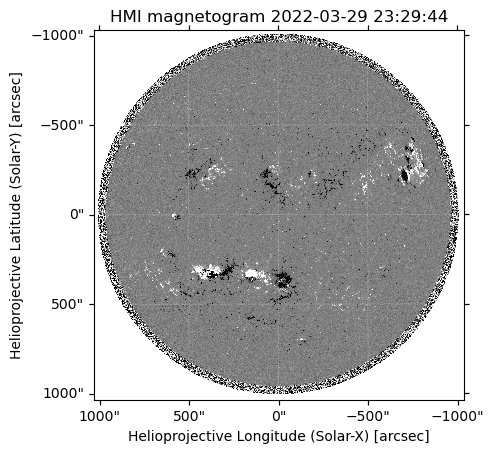

In [14]:
ani = map_sequence.plot()
Writer = animation.writers['ffmpeg']
writer = Writer(fps=6, metadata=dict(artist='SunPy'), bitrate=1800)
ani.save('mapsequence_animationfull_norm.mp4', writer=writer)

proceso de coalignment con AIA

In [11]:
map_hmi = sunpy.map.Map(r"C:\Users\Samuel\OneDrive\Documentos\research\fits\hmi.m_720s.20220330_000000_TAI.3.magnetogram.fits", allow_errors=True)
#map_aia = sunpy.map.Map('/content/drive/MyDrive/Research/Coronal rain/FITS_HMI&AIA/aia.lev1_euv_12s.2022-03-30T000310Z.171.image_lev1.fits', allow_errors=True)


In [ ]:
map_hmi.plot_settings['cmap'] = "hmimag"
map_hmi.plot_settings['norm'] = plt.Normalize(-1500, 1500)

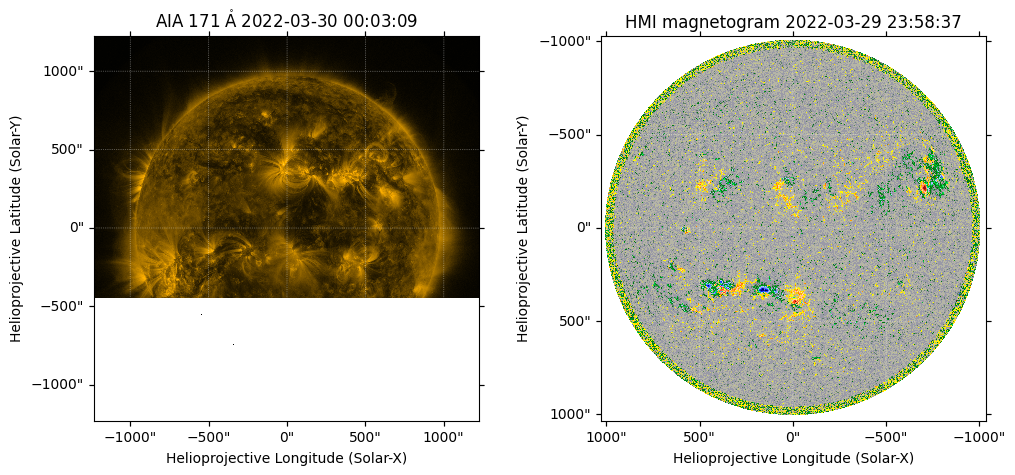

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection=map_aia)
map_aia.plot(axes=ax1, clip_interval=(1, 99.9)*u.percent)
ax2 = fig.add_subplot(122, projection=map_hmi)
map_hmi.plot(axes=ax2)

INFO:sunpy:Using mesh-based autoalignment


INFO: Using mesh-based autoalignment [sunpy.map.mapbase]


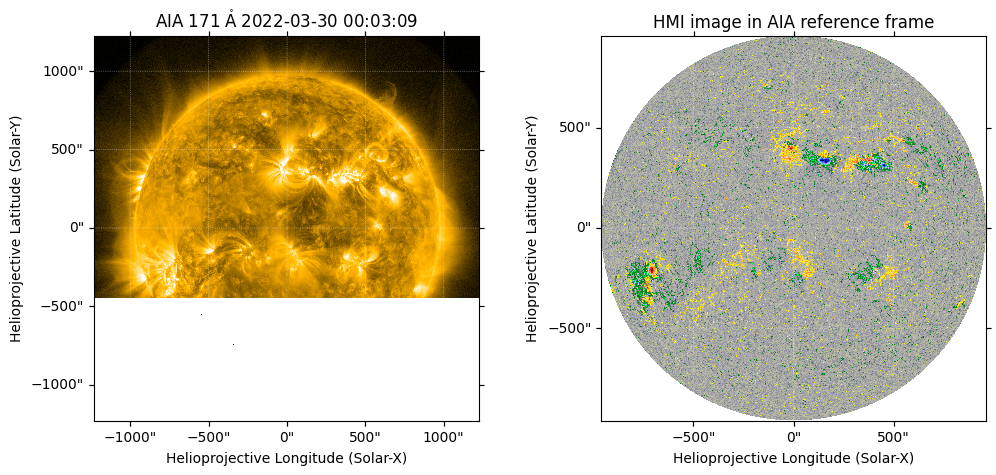

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection=map_aia)
map_aia.plot(axes=ax1, clip_interval=(1, 99.9)*u.percent)
ax2 = fig.add_subplot(122, projection=map_aia)
map_hmi.plot(axes=ax2, title='HMI image in AIA reference frame')

INFO:sunpy:Using mesh-based autoalignment


INFO: Using mesh-based autoalignment [sunpy.map.mapbase]


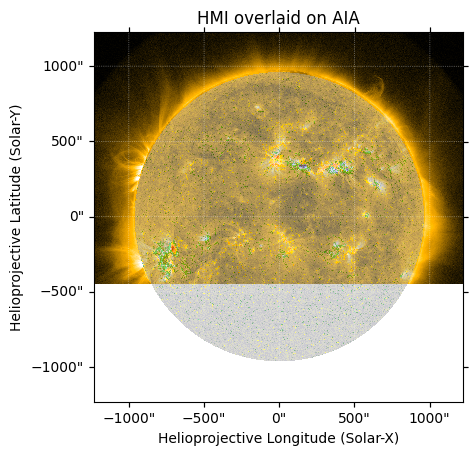

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(projection=map_aia)
map_aia.plot(axes=ax1, clip_interval=(1, 99.9)*u.percent)
map_hmi.plot(axes=ax1, alpha=0.5)
ax1.set_title('HMI overlaid on AIA')

plt.show()

In [12]:
print(map_hmi.plot_settings["norm"])

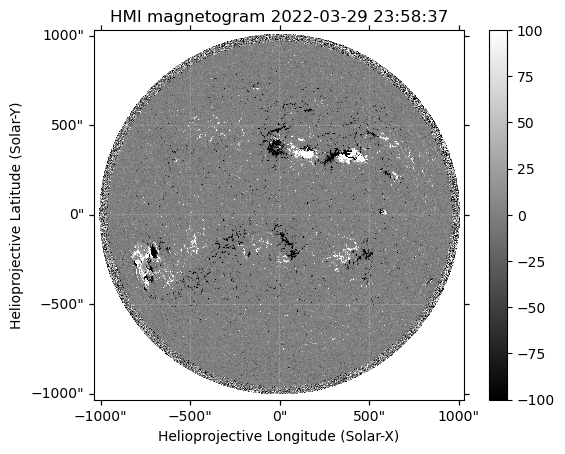

In [14]:
fig = plt.figure()
ax = fig.add_subplot(projection=map_hmi)
map_hmi.plot_settings["norm"].vmin = -100
map_hmi.plot_settings["norm"].vmax = 100
map_hmi.plot(axes=ax)
ax.invert_yaxis()
ax.invert_xaxis()
plt.colorbar()
plt.show()

C:\Users\Samuel\miniforge3\envs\sunpy\Lib\site-packages\astropy\visualization\wcsaxes\patches.py:197: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  super().__init__(vertices, **kwargs)


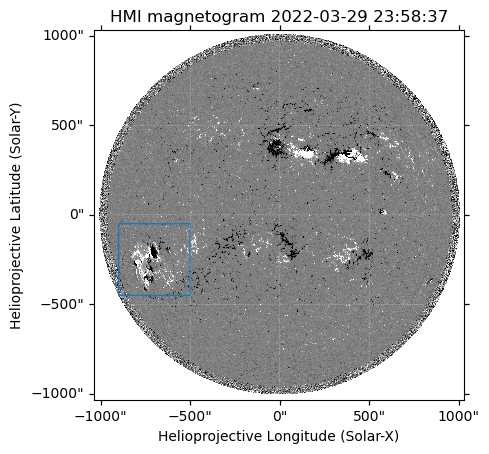

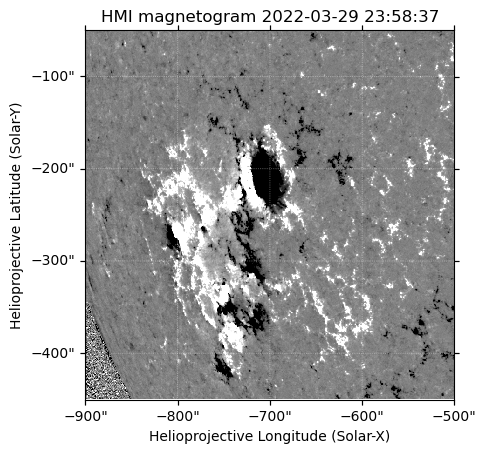

In [16]:
from astropy.coordinates import SkyCoord
roi_bottom_left = SkyCoord(Tx=-900*u.arcsec, Ty=-450*u.arcsec, frame=map_hmi.coordinate_frame)
roi_top_right = SkyCoord(Tx=-500*u.arcsec, Ty=-50*u.arcsec, frame=map_hmi.coordinate_frame)
fig = plt.figure()
ax = fig.add_subplot(projection=map_hmi)
map_hmi.plot(axes=ax)
map_hmi.draw_quadrangle(roi_bottom_left, top_right=roi_top_right, axes=ax, color='C0')
ax.invert_yaxis()
ax.invert_xaxis()
plt.show()
my_submap = map_hmi.submap(roi_bottom_left, top_right=roi_top_right)

fig = plt.figure()
ax = fig.add_subplot(projection=my_submap)
my_submap.plot(axes=ax)
ax.invert_yaxis()
ax.invert_xaxis()
plt.show()

In [17]:
map_hmi.wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'HPLN-TAN' 'HPLT-TAN'
CUNIT : 'deg' 'deg'
CRVAL : 0.0 0.0
CRPIX : 2040.59094 2049.67603
PC1_1 PC1_2  : -0.99999997184555 0.00023729496287441
PC2_1 PC2_2  : -0.00023729496287441 -0.99999997184555
CDELT : 0.00014000920777778 0.00014000920777778
NAXIS : 4096  4096

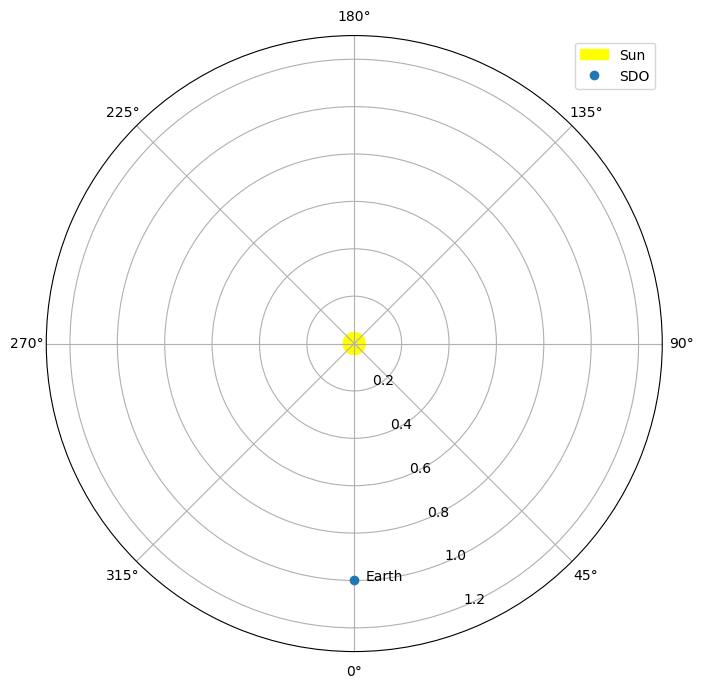

In [18]:
earth = get_body_heliographic_stonyhurst('earth', map_hmi.date)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(projection='polar')
circle = plt.Circle((0.0, 0.0), (10*u.Rsun).to_value(u.AU),
                    transform=ax.transProjectionAffine + ax.transAxes, color="yellow",
                    alpha=1, label="Sun")
ax.add_artist(circle)
ax.text(earth.lon.to_value("rad")+0.05, earth.radius.to_value(u.AU), "Earth")

for this_satellite, this_coord in [(m.observatory, m.observer_coordinate) for m in [map_hmi]]:
    ax.plot(this_coord.lon.to('rad'), this_coord.radius.to(u.AU), 'o', label=this_satellite)

ax.set_theta_zero_location("S")
ax.set_rlim(0, 1.3)
ax.legend()

plt.show()